In [1]:
import pickle as pk
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [25]:
!ls -lrt ../../data/tiles/*.pkl

-rw-r--r--  1 yoavfreund  staff  1836364 Oct 30 18:13 ../../data/tiles/tiles_89_extracted.pkl
-rw-r--r--  1 yoavfreund  staff  1292084 Oct 30 18:13 ../../data/tiles/tiles_106_extracted.pkl
-rw-r--r--  1 yoavfreund  staff  3387562 Oct 30 18:13 ../../data/tiles/tiles_88_extracted.pkl
-rw-r--r--  1 yoavfreund  staff   203539 Oct 30 18:13 ../../data/tiles/tiles_75_extracted.pkl
-rw-r--r--  1 yoavfreund  staff  1101586 Oct 30 18:13 ../../data/tiles/tiles_105_extracted.pkl
-rw-r--r--  1 yoavfreund  staff   992730 Oct 30 18:13 ../../data/tiles/tiles_104_extracted.pkl
-rw-r--r--  1 yoavfreund  staff   938302 Oct 30 18:13 ../../data/tiles/tiles_74_extracted.pkl
-rw-r--r--  1 yoavfreund  staff  2693605 Oct 30 18:13 ../../data/tiles/tiles_70_extracted.pkl
-rw-r--r--  1 yoavfreund  staff  1387333 Oct 30 18:13 ../../data/tiles/tiles_114_extracted.pkl
-rw-r--r--  1 yoavfreund  staff  3115422 Oct 30 18:13 ../../data/tiles/tiles_100_extracted.pkl
-rw-r--r--  1 yoavfreund  staff  2992959 Oct 30 18:14 .

In [26]:
D=pk.load(open('../../data/tiles/tiles_133_extracted.pkl','rb'))

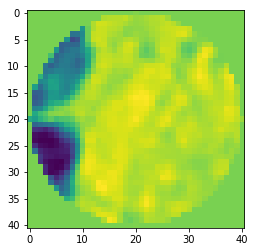

In [27]:
imshow(D[5]['normalized_patch'])

In [28]:
patches=[c['normalized_patch'] for c in D]

In [21]:
import sys
sys.path.append('/Users/yoavfreund/projects/shapeology/shapeology_code/scripts/')

In [23]:
from lib.shape_utils import plot_patches,pack_pics

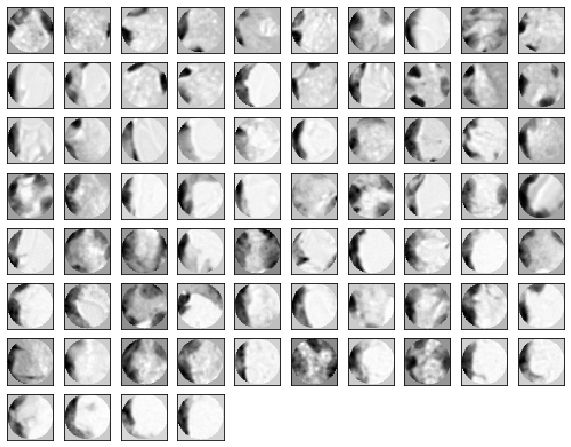

In [29]:
fig=figure(figsize=[10,10])
plot_patches(fig,pack_pics(patches),h=10,w=10)